In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
crossval = pd.read_table('../results/admixture/crossvalidation/CV_logs.txt', delimiter = ' ', header = None)
crossval = crossval.sort_values(by = [2])
crossval

,0,1,2,3
1,CV,error,(K=04):,0.20582
2,CV,error,(K=05):,0.20149
3,CV,error,(K=06):,0.21235
4,CV,error,(K=07):,0.20443
5,CV,error,(K=08):,0.19792
6,CV,error,(K=09):,0.21250
0,CV,error,(K=10):,0.23353


Text(0, 0.5, 'Cross validation error')

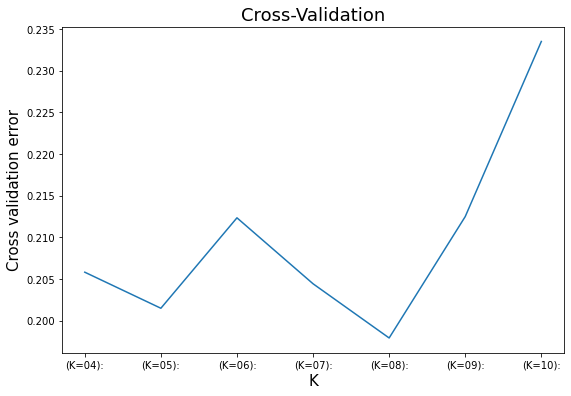

In [3]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(crossval[2], crossval[3])
ax.set_title('Cross-Validation', size = 18)
ax.set_xlabel('K', size = 15)
ax.set_ylabel('Cross validation error', size = 15)

In [4]:
filenames_chr7 = glob.glob('../results/admixture/chr7_females.pruned.*.Q')
filenames_chrX = glob.glob('../results/admixture/chrX_females.pruned.*.Q')

chr7, chrX = [], []
for file in filenames_chr7:
    chr7.append(pd.read_table(file, delimiter = ' ', header = None))
for file in filenames_chrX:
    chrX.append(pd.read_table(file, delimiter = ' ', header = None))

order7 = [0, 1, 4, 3, 5, 6, 2]
orderX = [3, 2, 0, 1, 6, 5, 4]
orderedX = [chrX[i] for i in orderX]
ordered7 = [chr7[i] for i in order7]

In [5]:
chr7_sorted, chrX_sorted = [], []
for df in ordered7:
    chr7_sorted.append(df.sort_values(by = list(df.columns.values)))
for df in orderedX:
    chrX_sorted.append(df.sort_values(by = list(df.columns.values)))

In [6]:
orderedX

[           0         1        2         3
 0   0.000010  0.000010  0.00001  0.999970
 1   0.000010  0.000015  0.00001  0.999965
 2   0.000010  0.000010  0.00001  0.999970
 3   0.000010  0.000011  0.00001  0.999969
 4   0.000011  0.024077  0.00001  0.975903
 ..       ...       ...      ...       ...
 90  0.000010  0.999970  0.00001  0.000010
 91  0.000010  0.999970  0.00001  0.000010
 92  0.000010  0.999970  0.00001  0.000010
 93  0.000010  0.999970  0.00001  0.000010
 94  0.000011  0.999969  0.00001  0.000010
 
 [95 rows x 4 columns],
            0        1         2         3         4
 0   0.000010  0.00001  0.999958  0.000012  0.000010
 1   0.000015  0.00001  0.999952  0.000013  0.000010
 2   0.000010  0.00001  0.999960  0.000010  0.000010
 3   0.000010  0.00001  0.999960  0.000010  0.000010
 4   0.000010  0.00001  0.977949  0.000010  0.022021
 ..       ...      ...       ...       ...       ...
 90  0.000010  0.00001  0.000010  0.000010  0.999960
 91  0.000010  0.00001  0.000010  

In [ ]:
fig, axes = plt.subplots(figsize=(10, 12), nrows=7, ncols=2, sharey=True)

# Filling out the first column
for row in range(7):
    ax = chr7_sorted[row].plot(ax=axes[row,0], kind='bar', stacked=True, width = 0.8, alpha=0.9, rot = 90)

# Filling out the second column
for row in range(7):
    ax = chrX_sorted[row].plot(ax=axes[row,1], kind='bar', stacked=True, width = 0.8, alpha=0.9, rot = 90)

# Setting the x and y ticks and removing the legends
for ax in fig.get_axes():
    ax.xaxis.set_tick_params(labelsize=4)
    ax.yaxis.set_tick_params(labelsize=4)
    ax.get_legend().remove()
    
# Formatting the labels so each column has a specific title and each row has a specific label
cols = ['Chromosome {}'.format(col) for col in ['7', 'X']]
rows = ['K = {}'.format(row) for row in range(4, 11)]

for ax, col in zip(axes[0], cols):
    ax.set_title(col)
    ax.title.set_size(12)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, size = 12)

# Adding a label for the x axis for all subplots
fig.text(0.5, 0, 'Individual #', va='center', ha='center', size = 14)

# Adding legend
line, label = ax.get_legend_handles_labels()
fig.legend(line, label)

fig.tight_layout()
plt.show
plt.savefig('../figures/admixture.females_7_X.pdf')